In [1]:
import pickle
import math
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, variance, stdev

In [2]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

In [3]:
pat = re.compile(r"\s+")
f = open("/Users/1zd/quantumjets/pythiaEvents/Pythia8Results.dat", 'r')

g = list(zip(*[ pat.sub(" ",x.strip()).split() for x in f]))

npart = np.array([ int(x) for x in g[0]])
sph = np.array([ float(x) for x in g[1]]) #thrust calculated using sphericity as seed axis
thr = np.array([ float(x) for x in g[2]])
niter = np.array([ int(x) for x in g[3]])

In [4]:
pat2 = re.compile(r"\s+")
fd = open("/Users/1zd/quantumjets/pythiaEvents/DWaveResults.dat", 'r')

g2 = list(zip(*[ pat2.sub(" ",x.strip()).split() for x in fd]))

dw = np.array([ float(x) for x in g2[0]])
sa = np.array([ float(x) for x in g2[1]])
rev = np.array([ float(x) for x in g2[2]])

In [6]:
pat3 = re.compile(r"\s+")
fd2 = open("/Users/1zd/quantumjets/pythiaEvents/DWaveResults_tune_10k.dat", 'r')

g3 = list(zip(*[ pat3.sub(" ",x.strip()).split() for x in fd2]))
dw2 = np.array([ float(x) for x in g3[0]])

In [7]:
pat4 = re.compile(r"\s+")
fd4 = open("/Users/1zd/quantumjets/pythiaEvents/IterRemVarResults.dat", 'r')

g4 = list(zip(*[ pat4.sub(" ",x.strip()).split() for x in fd4]))
itr = np.array([ float(x) for x in g4[0]])

In [8]:
pat5 = re.compile(r"\s+")
fd5 = open("/Users/1zd/quantumjets/pythiaEvents/DWaveResults_tune_5k.dat", 'r')

g5 = list(zip(*[ pat5.sub(" ",x.strip()).split() for x in fd5]))
dwt = np.array([ float(x) for x in g5[0]])

In [9]:
for i in range(len(sa)):
    if(truncate(sa[i],4)>thr[i]):
        sa[i] = thr[i]
    if(truncate(sph[i],4) > thr[i]):
        sph[i] = thr[i]
    if(truncate(dw2[i],4) >thr[i]):
        dw2[i] = thr[i]
    if(truncate(dw[i],4) >thr[i]):
        dw[i] = thr[i]
    if(truncate(rev[i],4) >thr[i]):
        rev[i] = thr[i]
    if(truncate(itr[i],4) >thr[i]):
        itr[i] = thr[i]
    if(truncate(dwt[i],4) >thr[i]):
        dwt[i] = thr[i]

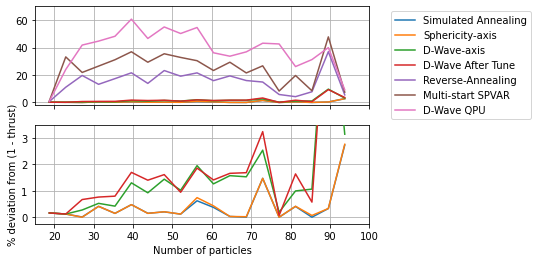

In [10]:
from scipy.stats import binned_statistic

diff_sa = []
diff_dw = []
diff_sph = []
diff_dw2 = []
diff_rev = []
diff_itr = []
diff_dwt = []
nbins = 18

for i in range(len(dw)):
    #if(truncate(sa[i],4)>thr[i]):
    #diff_sa.append(100.*((1.0 - thr[i]) - (1.0 - truncate(sa[i],4)))/ (1.0 - thr[i]))
    #else:
    diff_sa.append(100.*((1.0 - truncate(sa[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw.append(100.*((1.0 - truncate(dw[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_sph.append(100.*((1.0 - truncate(sph[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw2.append(100.*((1.0 - truncate(dw2[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_rev.append(100.*((1.0 - truncate(rev[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_itr.append(100.*((1.0 - truncate(itr[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dwt.append(100.*((1.0 - truncate(dwt[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))

fig, ax = plt.subplots()


s, edges, _ = binned_statistic(npart, diff_dw, statistic='mean', bins=np.linspace(0,100, 25))
s2, edges2, _ = binned_statistic(npart, diff_sa, statistic='mean', bins=np.linspace(0,100, 25))
s3, edges3, _ = binned_statistic(npart, diff_sph, statistic='mean', bins=np.linspace(0,100, 25))
s4, edges4, _ = binned_statistic(npart, diff_dw2, statistic='mean', bins=np.linspace(0,100, 25))
s5, edges5, _ = binned_statistic(npart, diff_rev, statistic='mean', bins=np.linspace(0,100, 25))
s6, edges6, _ = binned_statistic(npart, diff_itr, statistic='mean', bins=np.linspace(0,100, 25))
s7, edges7, _ = binned_statistic(npart, diff_dwt, statistic='mean', bins=np.linspace(0,100, 25))

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
#ax.hlines(s,edges[:-1],edges[1:], color="orchid", )

ys2 = np.repeat(s2,2)
xs2 = np.repeat(edges2,2)[1:-1]
#ax.hlines(s2,edges2[:-1],edges2[1:], color="gray", )

ys3 = np.repeat(s3,2)
xs3 = np.repeat(edges3,2)[1:-1]
#ax.hlines(s3,edges3[:-1],edges3[1:], )

ys4 = np.repeat(s4,2)
xs4 = np.repeat(edges4,2)[1:-1]
#ax.hlines(s4,edges4[:-1],edges4[1:], )

ys5 = np.repeat(s5,2)
xs5 = np.repeat(edges5,2)[1:-1]
#ax.hlines(s5,edges5[:-1],edges5[1:], )

ys6 = np.repeat(s6,2)
xs6 = np.repeat(edges6,2)[1:-1]
#ax.hlines(s6,edges6[:-1],edges6[1:], )

ys7 = np.repeat(s7,2)
xs7 = np.repeat(edges7,2)[1:-1]

#ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="orchid", zorder=3, label='D-Wave QPU')
#ax.scatter(edges2[:-1]+np.diff(edges2)/2, s2, c="gray", zorder=3, label='Simulated Annealing')
#ax.scatter(edges3[:-1]+np.diff(edges3)/2, s3, c="lavender", zorder=3, label='Sphericity-axis')
#ax.scatter(edges4[:-1]+np.diff(edges4)/2, s4, c="indigo", zorder=3, label='D-Wave-axis')
#ax.scatter(edges5[:-1]+np.diff(edges5)/2, s5, c="purple", zorder=3, label='Reverse-Annealing')
#ax.scatter(edges6[:-1]+np.diff(edges6)/2, s6, c="violet", zorder=3, label='Multi-start SPVAR')
ax1 = plt.subplot(211)

ax1.plot(edges2[:-1]+np.diff(edges2)/2, s2,  zorder=3, label='Simulated Annealing')
ax1.plot(edges3[:-1]+np.diff(edges3)/2, s3,  zorder=3, label='Sphericity-axis')
ax1.plot(edges4[:-1]+np.diff(edges3)/2, s4,  zorder=3, label='D-Wave-axis')
ax1.plot(edges7[:-1]+np.diff(edges7)/2, s7,  zorder=3, label='D-Wave After Tune')
ax1.plot(edges5[:-1]+np.diff(edges5)/2, s5,  zorder=3, label='Reverse-Annealing')
ax1.plot(edges6[:-1]+np.diff(edges6)/2, s6,  zorder=3, label='Multi-start SPVAR')
ax1.plot(edges[:-1]+np.diff(edges)/2, s, zorder=3, label='D-Wave QPU')


#ax1.set_xlabel('Number of particles')
#ax1.set_ylabel('% deviation from (1 - thrust)')
#ax1.legend(loc='right')

ax1.grid()
ax1.set_xlim([15,100])
ax1.set_ylim([-2,70])

plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax2 = plt.subplot(212, sharex=ax1)

ax2.plot(edges2[:-1]+np.diff(edges2)/2, s2,  zorder=3, label='Simulated Annealing')
ax2.plot(edges3[:-1]+np.diff(edges3)/2, s3,  zorder=3, label='Sphericity-axis')
ax2.plot(edges4[:-1]+np.diff(edges3)/2, s4,  zorder=3, label='D-Wave-axis')
ax2.plot(edges7[:-1]+np.diff(edges7)/2, s7,  zorder=3, label='D-Wave After Tune')

ax2.grid()
ax2.set_xlim([15,100])
ax2.set_ylim([-0.25,3.5])

ax2.set_xlabel('Number of particles')
ax2.set_ylabel('% deviation from (1 - thrust)')
#plt.setp(ax2.get_xticklabels(), visible=False)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#plt.grid()
#plt.ylim([-2,130])
#plt.xlim([15,90])
#plt.yscale('log')
#plt.savefig('plots/perc_thrust_vs_npart.png', bbox_inches="tight")
plt.show()

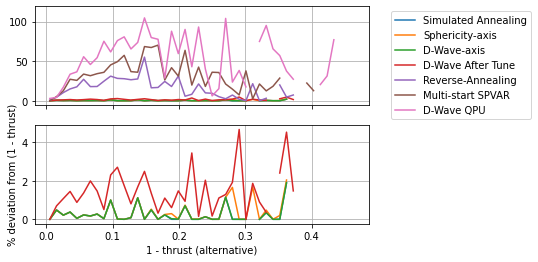

In [43]:
from scipy.stats import binned_statistic

fig, ax = plt.subplots()

diff_sa = []
diff_dw = []
diff_sph = []
diff_dw2 = []
diff_rev = []
diff_itr = []
diff_dwt = []

d_sa = []
d_dw = []
d_sph = []
d_dw2 = []
d_rev = []
d_itr = []
d_dwt = []
nbins = 18

for i in range(len(dw)):
    diff_sa.append(100.*((1.0 - truncate(sa[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw.append(100.*((1.0 - truncate(dw[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_sph.append(100.*((1.0 - truncate(sph[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw2.append(100.*((1.0 - truncate(dw2[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_rev.append(100.*((1.0 - truncate(rev[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_itr.append(100.*((1.0 - truncate(itr[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dwt.append(100.*((1.0 - truncate(dwt[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))

    d_sa.append(1.0 - truncate(sa[i], 4))
    d_dw.append(1.0 - truncate(dw[i], 4))
    d_sph.append(1.0 - truncate(sph[i], 4))
    d_dw2.append(1.0 - truncate(dw2[i], 4))
    d_rev.append(1.0 - truncate(rev[i], 4))
    d_itr.append(1.0 - truncate(itr[i], 4))
    d_dwt.append(1.0 - truncate(dwt[i], 4))

s, edges, _ = binned_statistic(d_dw, diff_dw, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s2, edges2, _ = binned_statistic(d_sa, diff_sa, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s3, edges3, _ = binned_statistic(d_sph, diff_sph, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s4, edges4, _ = binned_statistic(d_dw2, diff_dw2, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s5, edges5, _ = binned_statistic(d_rev, diff_rev, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s6, edges6, _ = binned_statistic(d_itr, diff_itr, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s7, edges7, _ = binned_statistic(d_dwt, diff_dwt, statistic='mean', bins=np.linspace(0.0,0.5, 50))

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
#ax.hlines(s,edges[:-1],edges[1:], color="orchid", )

ys2 = np.repeat(s2,2)
xs2 = np.repeat(edges2,2)[1:-1]
#ax.hlines(s2,edges2[:-1],edges2[1:], color="gray", )

ys3 = np.repeat(s3,2)
xs3 = np.repeat(edges3,2)[1:-1]
#ax.hlines(s3,edges3[:-1],edges3[1:], )

ys4 = np.repeat(s4,2)
xs4 = np.repeat(edges4,2)[1:-1]
#ax.hlines(s4,edges4[:-1],edges4[1:], )

ys5 = np.repeat(s5,2)
xs5 = np.repeat(edges5,2)[1:-1]
#ax.hlines(s5,edges5[:-1],edges5[1:], )

ys6 = np.repeat(s6,2)
xs6 = np.repeat(edges6,2)[1:-1]
#ax.hlines(s6,edges6[:-1],edges6[1:], )

ys7 = np.repeat(s7,2)
xs7 = np.repeat(edges7,2)[1:-1]

ax1 = plt.subplot(211)

ax1.plot(edges2[:-1]+np.diff(edges2)/2, s2,  zorder=3, label='Simulated Annealing')
ax1.plot(edges3[:-1]+np.diff(edges3)/2, s3,  zorder=3, label='Sphericity-axis')
ax1.plot(edges4[:-1]+np.diff(edges3)/2, s4,  zorder=3, label='D-Wave-axis')
ax1.plot(edges7[:-1]+np.diff(edges7)/2, s7,  zorder=3, label='D-Wave After Tune')
ax1.plot(edges5[:-1]+np.diff(edges5)/2, s5,  zorder=3, label='Reverse-Annealing')
ax1.plot(edges6[:-1]+np.diff(edges6)/2, s6,  zorder=3, label='Multi-start SPVAR')
ax1.plot(edges[:-1]+np.diff(edges)/2, s, zorder=3, label='D-Wave QPU')

ax1.grid()
#ax1.set_xlim([15,100])
#ax1.set_ylim([-2,70])

plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax2 = plt.subplot(212, sharex=ax1)

ax2.plot(edges2[:-1]+np.diff(edges2)/2, s2,  zorder=3, label='Simulated Annealing')
ax2.plot(edges3[:-1]+np.diff(edges3)/2, s3,  zorder=3, label='Sphericity-axis')
ax2.plot(edges4[:-1]+np.diff(edges3)/2, s4,  zorder=3, label='D-Wave-axis')
ax2.plot(edges7[:-1]+np.diff(edges7)/2, s7,  zorder=3, label='D-Wave After Tune')

ax2.grid()
#ax2.set_xlim([15,100])
#ax2.set_ylim([-0.25,3.5])

ax2.set_xlabel('1 - thrust (alternative)')
ax2.set_ylabel('% deviation from (1 - thrust)')
plt.savefig('plots/percentage_thrust_deviation_vs_thrust.png', bbox_inches="tight")
plt.show()

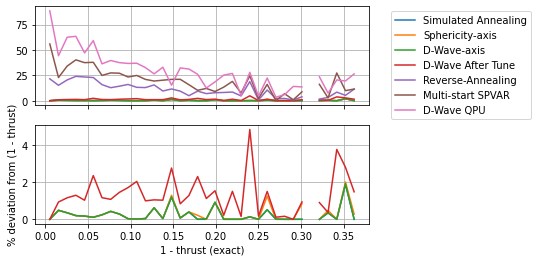

In [44]:
from scipy.stats import binned_statistic

fig, ax = plt.subplots()

diff_sa = []
diff_dw = []
diff_sph = []
diff_dw2 = []
diff_rev = []
diff_itr = []
diff_dwt = []

d_sa = []
d_dw = []
d_sph = []
d_dw2 = []
d_rev = []
d_itr = []
d_dwt = []
d_thr = []
nbins = 18

for i in range(len(dw)):
    diff_sa.append(100.*((1.0 - truncate(sa[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw.append(100.*((1.0 - truncate(dw[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_sph.append(100.*((1.0 - truncate(sph[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw2.append(100.*((1.0 - truncate(dw2[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_rev.append(100.*((1.0 - truncate(rev[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_itr.append(100.*((1.0 - truncate(itr[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dwt.append(100.*((1.0 - truncate(dwt[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))

    d_sa.append(1.0 - truncate(sa[i], 4))
    d_dw.append(1.0 - truncate(dw[i], 4))
    d_sph.append(1.0 - truncate(sph[i], 4))
    d_dw2.append(1.0 - truncate(dw2[i], 4))
    d_rev.append(1.0 - truncate(rev[i], 4))
    d_itr.append(1.0 - truncate(itr[i], 4))
    d_dwt.append(1.0 - truncate(dwt[i], 4))
    d_thr.append(1.0 - truncate(thr[i], 4))

s, edges, _ = binned_statistic(d_thr, diff_dw, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s2, edges2, _ = binned_statistic(d_thr, diff_sa, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s3, edges3, _ = binned_statistic(d_thr, diff_sph, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s4, edges4, _ = binned_statistic(d_thr, diff_dw2, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s5, edges5, _ = binned_statistic(d_thr, diff_rev, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s6, edges6, _ = binned_statistic(d_thr, diff_itr, statistic='mean', bins=np.linspace(0.0,0.5, 50))
s7, edges7, _ = binned_statistic(d_thr, diff_dwt, statistic='mean', bins=np.linspace(0.0,0.5, 50))

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
#ax.hlines(s,edges[:-1],edges[1:], color="orchid", )

ys2 = np.repeat(s2,2)
xs2 = np.repeat(edges2,2)[1:-1]
#ax.hlines(s2,edges2[:-1],edges2[1:], color="gray", )

ys3 = np.repeat(s3,2)
xs3 = np.repeat(edges3,2)[1:-1]
#ax.hlines(s3,edges3[:-1],edges3[1:], )

ys4 = np.repeat(s4,2)
xs4 = np.repeat(edges4,2)[1:-1]
#ax.hlines(s4,edges4[:-1],edges4[1:], )

ys5 = np.repeat(s5,2)
xs5 = np.repeat(edges5,2)[1:-1]
#ax.hlines(s5,edges5[:-1],edges5[1:], )

ys6 = np.repeat(s6,2)
xs6 = np.repeat(edges6,2)[1:-1]
#ax.hlines(s6,edges6[:-1],edges6[1:], )

ys7 = np.repeat(s7,2)
xs7 = np.repeat(edges7,2)[1:-1]

ax1 = plt.subplot(211)

ax1.plot(edges2[:-1]+np.diff(edges2)/2, s2,  zorder=3, label='Simulated Annealing')
ax1.plot(edges3[:-1]+np.diff(edges3)/2, s3,  zorder=3, label='Sphericity-axis')
ax1.plot(edges4[:-1]+np.diff(edges3)/2, s4,  zorder=3, label='D-Wave-axis')
ax1.plot(edges7[:-1]+np.diff(edges7)/2, s7,  zorder=3, label='D-Wave After Tune')
ax1.plot(edges5[:-1]+np.diff(edges5)/2, s5,  zorder=3, label='Reverse-Annealing')
ax1.plot(edges6[:-1]+np.diff(edges6)/2, s6,  zorder=3, label='Multi-start SPVAR')
ax1.plot(edges[:-1]+np.diff(edges)/2, s, zorder=3, label='D-Wave QPU')

ax1.grid()
#ax1.set_xlim([15,100])
#ax1.set_ylim([-2,70])

plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax2 = plt.subplot(212, sharex=ax1)

ax2.plot(edges2[:-1]+np.diff(edges2)/2, s2,  zorder=3, label='Simulated Annealing')
ax2.plot(edges3[:-1]+np.diff(edges3)/2, s3,  zorder=3, label='Sphericity-axis')
ax2.plot(edges4[:-1]+np.diff(edges3)/2, s4,  zorder=3, label='D-Wave-axis')
ax2.plot(edges7[:-1]+np.diff(edges7)/2, s7,  zorder=3, label='D-Wave After Tune')

ax2.grid()
#ax2.set_xlim([15,100])
#ax2.set_ylim([-0.25,3.5])

ax2.set_xlabel('1 - thrust (exact)')
ax2.set_ylabel('% deviation from (1 - thrust)')
plt.savefig('plots/percentage_thrust_deviation_vs_exact_thrust.png', bbox_inches="tight")
plt.show()